# Using the Pandasql library to perform sql queries of a Pandas Dataframe containing OCA-STAT New York State Unified Court System data, Nov. 2020 - Jun. 2023.

## 1. Install packages

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#pandasql does not support newer versions of sqlalchemy
!pip install --upgrade 'sqlalchemy<2.0'

In [ ]:
!pip install pandasql
from pandasql import sqldf

## 2. Import data

In [5]:
df = pd.read_parquet('/OCA_STAT.parquet')

In [6]:
df.head()

,row_#,date,court_type,region,district,county,court,arresting_agency,arrest_type,arraign_year,arraign_month,top_charge_at_arraignment,severity,weight,law,article.section,attempt_flag,gender,ethnicity,race,arrest_age,docket_status,disposition_type,disposition_detail,dismissal_reason,most_severe_sentence,fines_imposed,fees_imposed,surcharges_imposed
0,1,2020-11-01,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT 014,DAT,2020,11,Petit Larceny,Misdemeanor,AM,PL,155.25,,Male,Non-Hispanic,Unknown,31.0,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN
1,2,2020-11-01,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,DAT,2020,11,Petit Larceny,Misdemeanor,AM,PL,155.25,,Female,Hispanic,White,34.0,Disposed,Dism-ACD,Adjourned - Cpl Section 170.55,Adjourned - Cpl Section 170.55,,NaN,NaN,NaN
2,3,2020-11-01,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,Unknown,DAT,2020,11,Intnt/Frd Obt Trns W/O Py,Misdemeanor,AM,PL,165.15,,Male,Hispanic,White,19.0,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN
3,4,2020-11-01,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,DAT,2020,11,Petit Larceny,Misdemeanor,AM,PL,155.25,,Male,Hispanic,White,27.0,Disposed,Dismissed,Dismissed-Interest Of Justice,Dismissed-Interest Of Justice,,NaN,NaN,NaN
4,5,2020-11-01,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,NYC Summons,2020,11,Dis/Con:Obstructing Traff,Violation,V,PL,240.20,,Male,Unknown,Unknown,NaN,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN


## 3. Explore the data

## &nbsp; A. Fines

In [7]:
sqldf('SELECT DISTINCT severity FROM df')

,severity
0,Misdemeanor
1,Violation
2,Felony


### &nbsp; What was the average fine for misdemeanors or violations imposed by each Court?

In [8]:
#the average fine for misdemeaners and violations in all cases where fines were imposed
sqldf('''SELECT district AS District,
              court AS Court,
              SUM(fines_imposed) AS Fines,
              COUNT(fines_imposed) as Cases,
              ROUND(AVG(fines_imposed),2) as Average
              FROM df WHERE severity = "Misdemeanor" OR severity = "Violation"
              GROUP BY district, court ORDER BY Average DESC''')

,District,Court,Fines,Cases,Average
0,District 12,Bronx Criminal Court,3744973.1,6323,592.28
1,District 13,Richmond Supreme Court,1075.0,2,537.50
2,District 1,New York Supreme Court,2120.0,4,530.00
3,District 11,Queens Supreme Court,9075.0,24,378.13
4,District 1,New York Criminal Court,2146700.0,5752,373.21
5,District 2,Kings Criminal Court,6747716.5,21009,321.18
6,District 11,Queens Criminal Court,3551872.0,11468,309.72
7,District 13,Richmond Criminal Court,515472.5,2628,196.15
8,District 2,Kings Supreme Court,775.0,5,155.00
9,District 2,Red Hook Community Court,10385.0,111,93.56


### &nbsp; What was the average fine grouped by race for misdemeanors or violations imposed by each Criminal Court?

In [9]:
#the average fine for misdemeaners and violations in criminal cases where fines were imposed
court_fines = sqldf('''SELECT district AS District,
              REPLACE (court,' Court', '') AS Court,
              race AS Race,
              SUM(fines_imposed) AS Fines,
              COUNT(fines_imposed) as Cases,
              ROUND(AVG(fines_imposed),2) as Average
              FROM df WHERE severity = "Misdemeanor" OR severity = "Violation"
              GROUP BY district, court, race Having court LIKE '%Criminal%' ORDER BY Average DESC''')
court_fines

,District,Court,Race,Fines,Cases,Average
0,District 12,Bronx Criminal,Unknown,3374040.1,3757,898.07
1,District 1,New York Criminal,Unknown,1767885.0,3673,481.32
2,District 13,Richmond Criminal,Unknown,228700.0,483,473.50
3,District 11,Queens Criminal,Unknown,2574735.0,5450,472.43
4,District 2,Kings Criminal,Unknown,5911805.0,14547,406.39
5,District 12,Bronx Criminal,Other,300.0,1,300.00
6,District 1,New York Criminal,Black,157425.0,782,201.31
7,District 13,Richmond Criminal,Indian,1150.0,6,191.67
8,District 1,New York Criminal,White,191445.0,1003,190.87
9,District 11,Queens Criminal,White,504495.0,2776,181.73


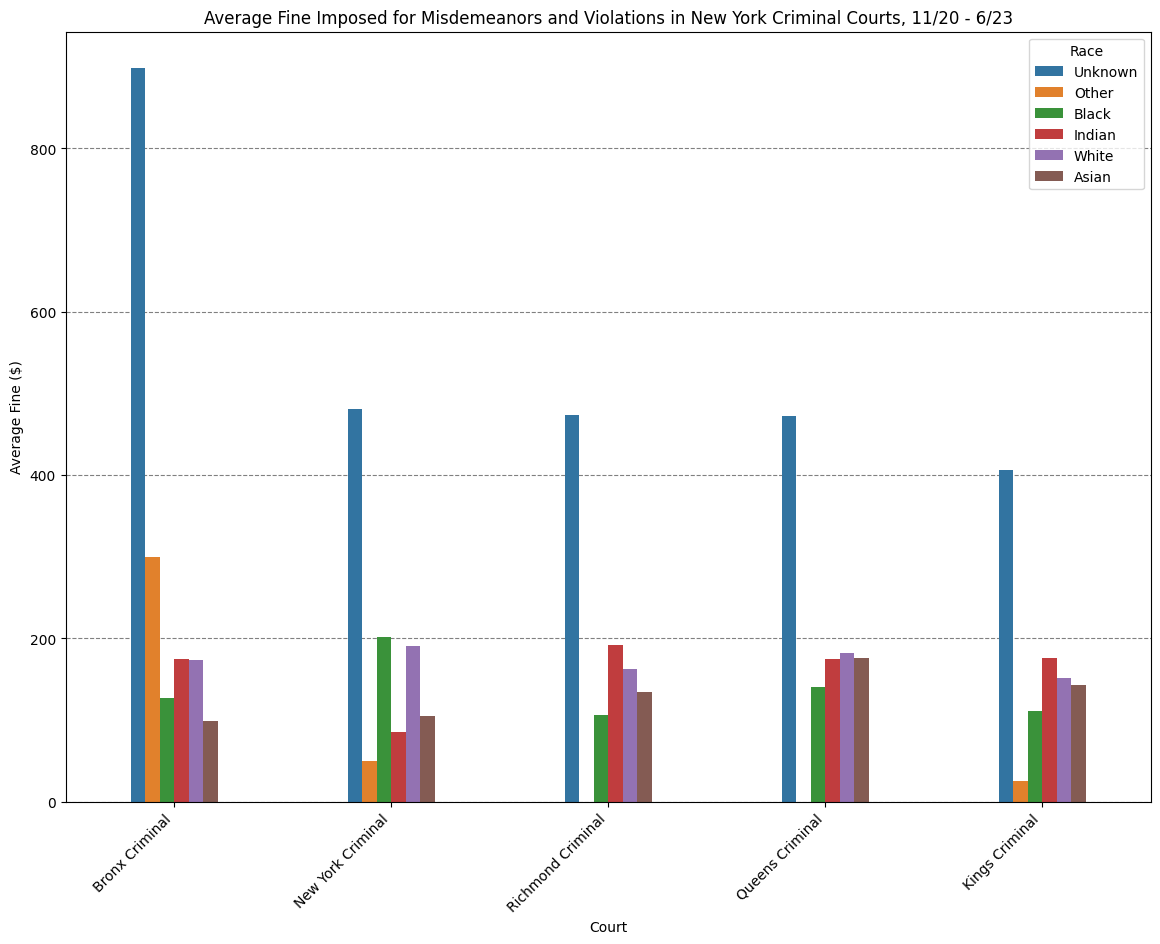

In [10]:
#Plot the results
court_fines_wide = court_fines.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14,10))

sns.barplot(ax=ax, data=court_fines_wide, x='Court', y='Average', hue='Race', width=.4)

ax.set_title('Average Fine Imposed for Misdemeanors and Violations in New York Criminal Courts, 11/20 - 6/23')
ax.set_ylabel('Average Fine ($)')
ax.set_xlabel('Court')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.show()

### &nbsp; Investigate the large fines for 'Unknown'.

In [11]:
#Query using Pandas query method
df.query('court == "Bronx Criminal Court" and race == "Unknown"')['fines_imposed'].dropna().sort_values()

345257       10.0
382800       20.0
547556       25.0
290689       25.0
290691       25.0
           ...   
328037     5000.0
364802    10000.0
308737    10000.0
364087    25000.0
364803    35000.0
Name: fines_imposed, Length: 3762, dtype: float64

In [12]:
#Look at the individual row with the $35,000 fine
df.iloc[364803]

row_#                                                               364804
date                                                   2022-09-01 00:00:00
court_type                                        Local-NYC Criminal Court
region                                                                 NYC
district                                                       District 12
county                                                               Bronx
court                                                 Bronx Criminal Court
arresting_agency                                   Department Of Buildings
arrest_type                                                    NYC Summons
arraign_year                                                          2022
arraign_month                                                            9
top_charge_at_arraignment    Building Code; Unlawful Acts Lesser Violation
severity                                                         Violation
weight                   

## &nbsp; B. Severity

### &nbsp; What were the monthly number of arraignments by severity for all New York City Courts?

In [13]:
monthly_severity = sqldf('''SELECT
                            date AS Date,
                            arraign_year || '-' || arraign_month as Date_label,
                            severity AS Severity,
                            COUNT(severity) as Arraingments
                            FROM df
                            GROUP BY Date, Severity
                            ORDER BY Date''')
monthly_severity

,Date,Date_label,Severity,Arraingments
0,2020-11-01 00:00:00.000000,2020-11,Felony,3156
1,2020-11-01 00:00:00.000000,2020-11,Misdemeanor,8162
2,2020-11-01 00:00:00.000000,2020-11,Violation,1574
3,2020-12-01 00:00:00.000000,2020-12,Felony,3318
4,2020-12-01 00:00:00.000000,2020-12,Misdemeanor,8576
...,...,...,...,...
91,2023-05-01 00:00:00.000000,2023-5,Misdemeanor,13843
92,2023-05-01 00:00:00.000000,2023-5,Violation,5398
93,2023-06-01 00:00:00.000000,2023-6,Felony,4899
94,2023-06-01 00:00:00.000000,2023-6,Misdemeanor,13447


In [14]:
#Create a wide Dataframe to plot the results
monthly_severity_wide1 = monthly_severity.reset_index(drop=True).drop(columns='Date')

severities = monthly_severity_wide1.Severity.unique().tolist()
monthly_severity_wide2 = pd.DataFrame()

monthly_severity_wide2['Date'] = monthly_severity_wide1.Date_label.unique()

for severity in severities:
  monthly_severity_wide2[severity] =  monthly_severity_wide1.query('Severity == @severity')['Arraingments'].reset_index(drop=True)


monthly_severity_wide2


,Date,Felony,Misdemeanor,Violation
0,2020-11,3156,8162,1574
1,2020-12,3318,8576,3662
2,2021-1,3177,10110,3664
3,2021-2,2681,7943,2385
4,2021-3,3396,9661,2787
...,...,...,...,...
27,2023-2,4143,11705,3209
28,2023-3,4716,13441,4223
29,2023-4,4620,13307,4344
30,2023-5,4891,13843,5398


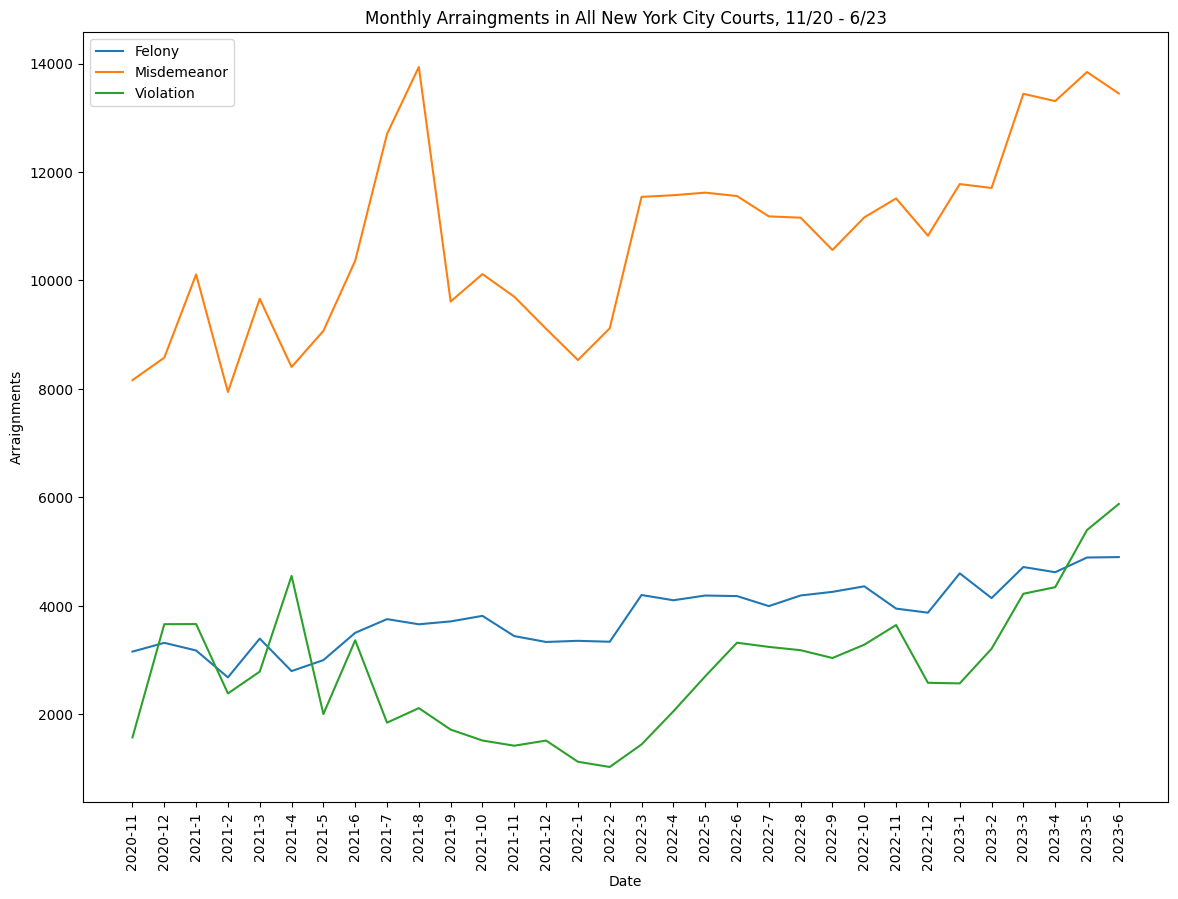

In [15]:
#Plot the results
ax = monthly_severity_wide2.plot(x='Date', figsize=(14,10), title='Monthly Arraingments in All New York City Courts, 11/20 - 6/23')
ax.set_xticks(range(len(monthly_severity_wide2)))
ax.set_xticklabels([item for item in monthly_severity_wide2.Date.tolist()], rotation=90)
plt.ylabel('Arraignments')
fig.show()


###  &nbsp; What were the monthly number of arraignments by severity for New York City Criminal Courts?

In [16]:
monthly_severity_district = sqldf('''SELECT
                            date AS Date,
                            arraign_year || '-' || arraign_month as Date_label,
                            district AS District,
                            REPLACE (court,' Court', '') AS Court,
                            severity AS Severity,
                            COUNT(severity) as Arraingments
                            FROM df
                            GROUP BY Date, District, Court, Severity
                            Having Court LIKE '%Criminal%'
                            ORDER BY Date''')
monthly_severity_district


,Date,Date_label,District,Court,Severity,Arraingments
0,2020-11-01 00:00:00.000000,2020-11,District 1,New York Criminal,Felony,530
1,2020-11-01 00:00:00.000000,2020-11,District 1,New York Criminal,Misdemeanor,1235
2,2020-11-01 00:00:00.000000,2020-11,District 1,New York Criminal,Violation,167
3,2020-11-01 00:00:00.000000,2020-11,District 11,Queens Criminal,Felony,436
4,2020-11-01 00:00:00.000000,2020-11,District 11,Queens Criminal,Misdemeanor,1460
...,...,...,...,...,...,...
475,2023-06-01 00:00:00.000000,2023-6,District 13,Richmond Criminal,Misdemeanor,676
476,2023-06-01 00:00:00.000000,2023-6,District 13,Richmond Criminal,Violation,111
477,2023-06-01 00:00:00.000000,2023-6,District 2,Kings Criminal,Felony,1170
478,2023-06-01 00:00:00.000000,2023-6,District 2,Kings Criminal,Misdemeanor,3857


In [17]:
#Create a wide Dataframe to plot the results
monthly_severity_district_wide1 = monthly_severity_district.reset_index(drop=True).drop(columns='Date')

severities = monthly_severity_district_wide1.Severity.unique().tolist()
districts = monthly_severity_district_wide1.District.unique().tolist()


monthly_severity_district_wide2 = pd.DataFrame()

monthly_severity_district_wide2['Date'] = monthly_severity_district_wide1.Date_label.unique()

for district in districts:
  for severity in severities:
    monthly_severity_district_wide2[severity + " " + district] =  monthly_severity_district_wide1.query('Severity == @severity and District == @district')['Arraingments'].reset_index(drop=True)


monthly_severity_district_wide2

,Date,Felony District 1,Misdemeanor District 1,Violation District 1,Felony District 11,Misdemeanor District 11,Violation District 11,Felony District 12,Misdemeanor District 12,Violation District 12,Felony District 13,Misdemeanor District 13,Violation District 13,Felony District 2,Misdemeanor District 2,Violation District 2
0,2020-11,530,1235,167,436,1460,284,369,1665,710,107,226,9,768,3540,389
1,2020-12,573,1625,729,522,1443,184,372,2199,1511,124,269,31,721,2997,1186
2,2021-1,595,1629,356,503,3382,583,383,2045,1833,116,288,93,874,2733,792
3,2021-2,504,1728,297,469,2242,455,358,1721,946,116,272,33,611,1938,613
4,2021-3,622,1750,451,485,3382,716,440,1630,783,136,349,40,764,2494,778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2023-2,602,2495,724,588,2716,429,500,2469,836,134,469,78,922,3386,1103
28,2023-3,651,2735,992,713,3093,529,504,2442,1094,182,525,134,1050,4420,1427
29,2023-4,587,2785,1071,773,3116,748,548,2346,889,166,554,103,1067,4276,1475
30,2023-5,730,2845,1126,841,3348,932,528,2658,1344,167,584,96,1074,4233,1838


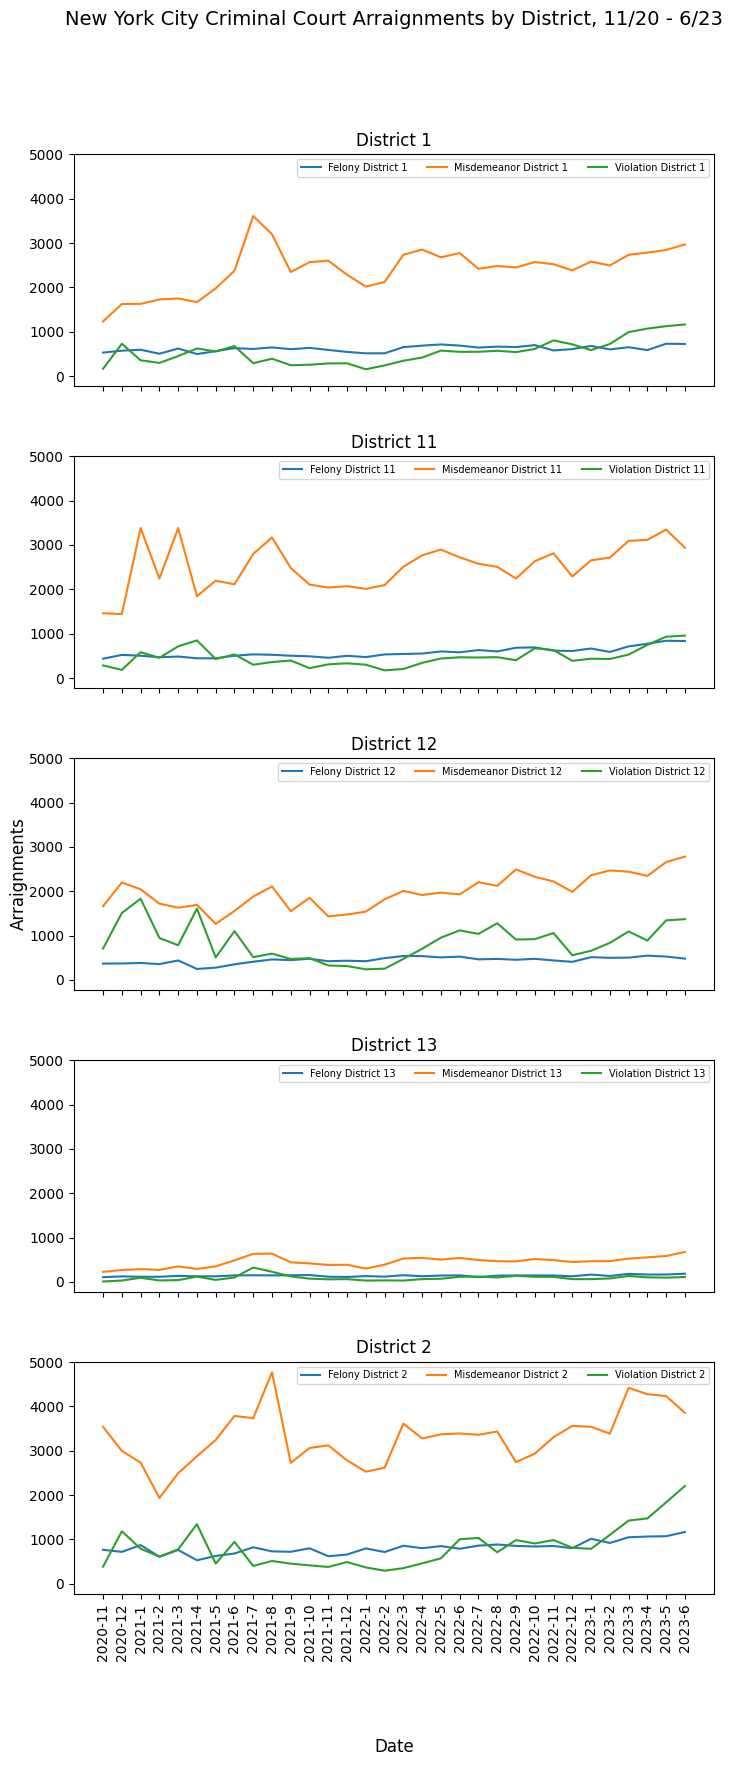

In [18]:
#Plot the results
severity_and_district = monthly_severity_district_wide2.columns.to_list()[1:]

fig, axes = plt.subplots(5,1,sharey=True, sharex=True)
fig.set_size_inches(8,18)

plt.setp(axes, xticks=range(len(monthly_severity_district_wide2)), xticklabels=[item for item in monthly_severity_wide2.Date.tolist()])

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=.4,
                    hspace=.3)

for i in range(5):
  n=(i*3+2)

  f_dist = severity_and_district[n-2]
  m_dist = severity_and_district[n-1]
  v_dist = severity_and_district[n]

  axes[i].plot(monthly_severity_district_wide2[[f_dist,m_dist,v_dist]], label=[f_dist,m_dist,v_dist] )
  axes[i].set_title(districts[i])
  axes[i].legend(loc="upper right", ncols=3, prop={'size':7})


fig.supxlabel('Date')
fig.supylabel('Arraignments')
fig.suptitle('New York City Criminal Court Arraignments by District, 11/20 - 6/23', fontsize=14)

print('')

